<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration and Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('customer_segmentation.csv')
print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [ ]:
print(data.describe())

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


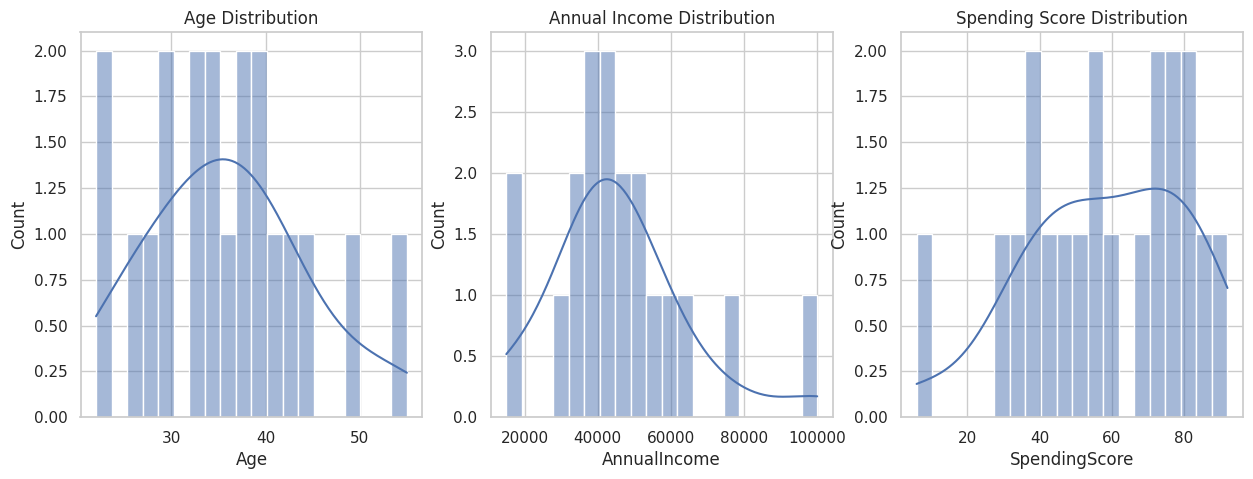

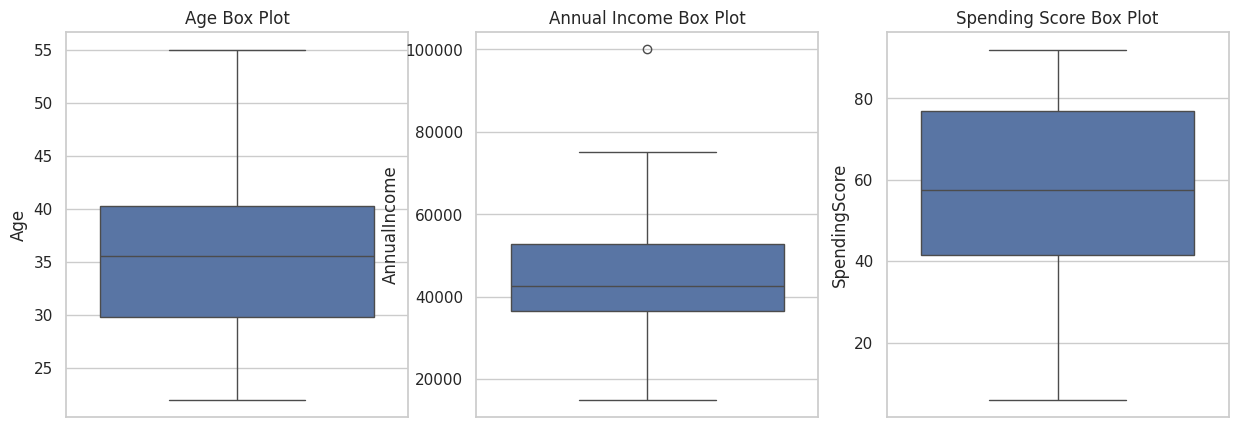

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['AnnualIncome'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['SpendingScore'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['AnnualIncome'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['SpendingScore'])
plt.title('Spending Score Box Plot')

plt.show()

In [ ]:
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore']

scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data_scaled.head())

   CustomerID       Age  AnnualIncome  SpendingScore
0           1 -1.658204     -1.641181      -0.894674
1           2 -0.096128     -0.300347       1.032316
2           3 -1.177565     -0.836681       0.848794
3           4  0.504671      0.235987      -0.848794
4           5  2.307066      2.917656      -2.408738


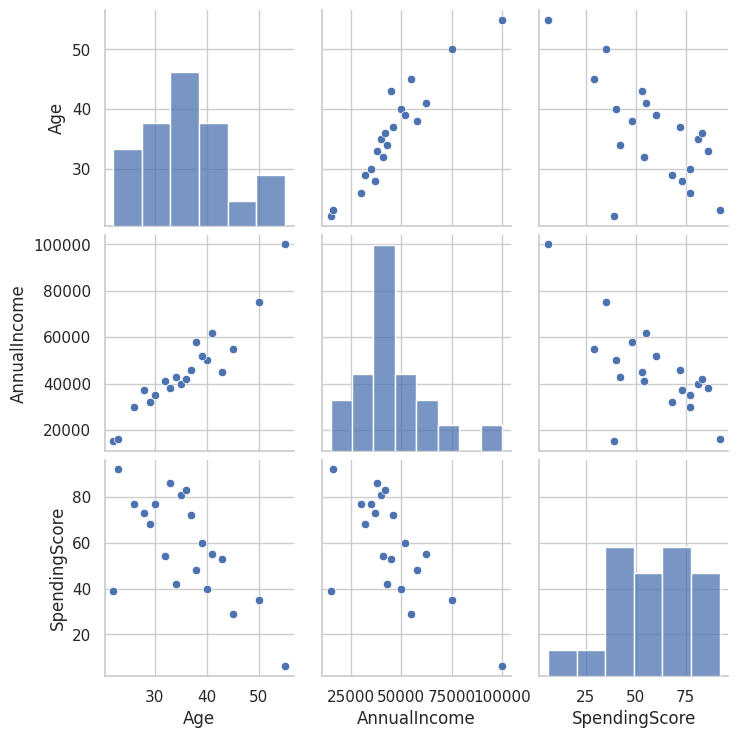

In [ ]:
sns.pairplot(data[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

# 2. Model Development

In [ ]:
X = data[['AnnualIncome', 'SpendingScore']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        0
1           2   35         40000             81        2
2           3   26         30000             77        0
3           4   40         50000             40        2
4           5   55        100000              6        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

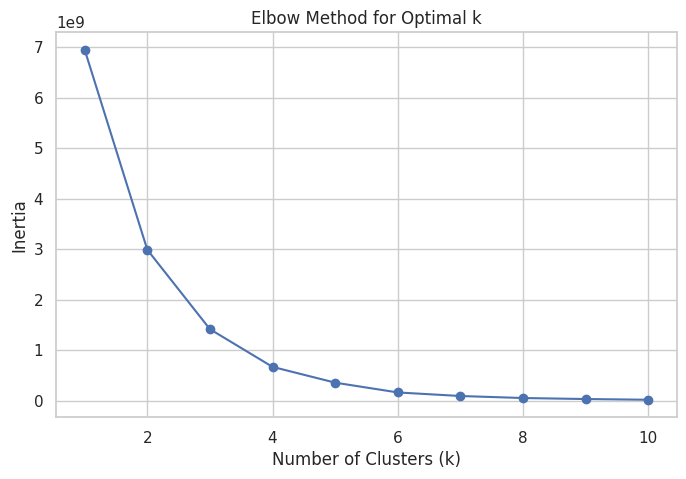

In [ ]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Silhouette Score for k=2: 0.5446754637535104
Silhouette Score for k=3: 0.43547693405193544
Silhouette Score for k=4: 0.5647691793769598
Silhouette Score for k=5: 0.5381747194667021
Silhouette Score for k=6: 0.5001467510947044


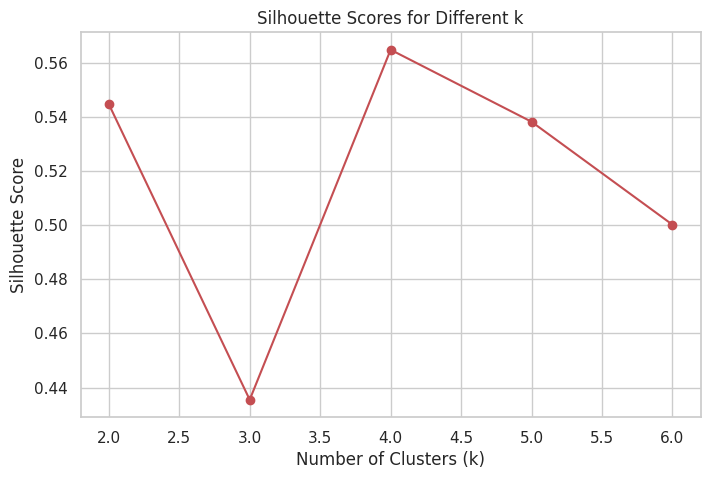

In [ ]:
silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In [ ]:
optimal_k = 4

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X)

print(data.head())

print(kmeans_optimal.cluster_centers_)

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        3
1           2   35         40000             81        0
2           3   26         30000             77        0
3           4   40         50000             40        2
4           5   55        100000              6        1
[[3.90000000e+04 6.96363636e+01]
 [8.75000000e+04 2.05000000e+01]
 [5.54000000e+04 4.64000000e+01]
 [1.55000000e+04 6.55000000e+01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


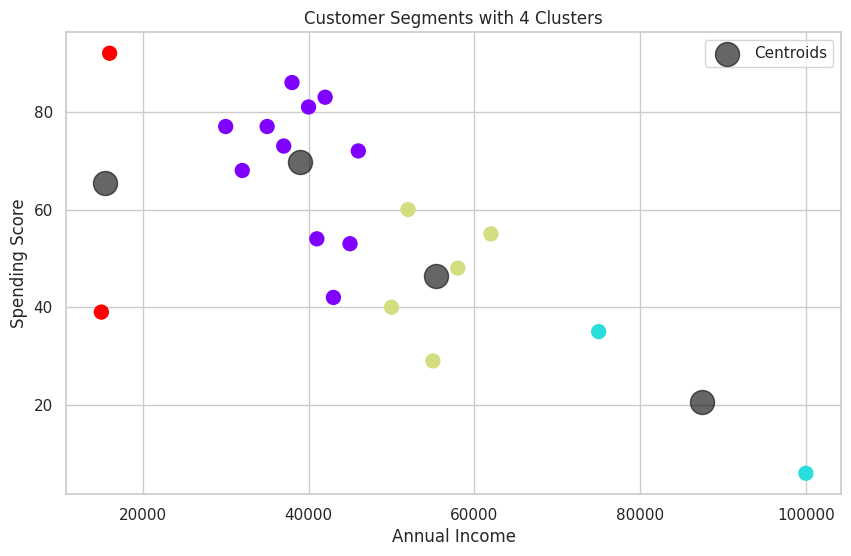

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='rainbow', s=100)

centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'Customer Segments with {optimal_k} Clusters')
plt.legend()
plt.show()

# 3. Model Evaluation

In [ ]:
inertia = kmeans_optimal.inertia_
print(f'Inertia (Sum of Squared Distances): {inertia}')

Inertia (Sum of Squared Distances): 670204418.7454547


In [ ]:
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5647691793769598


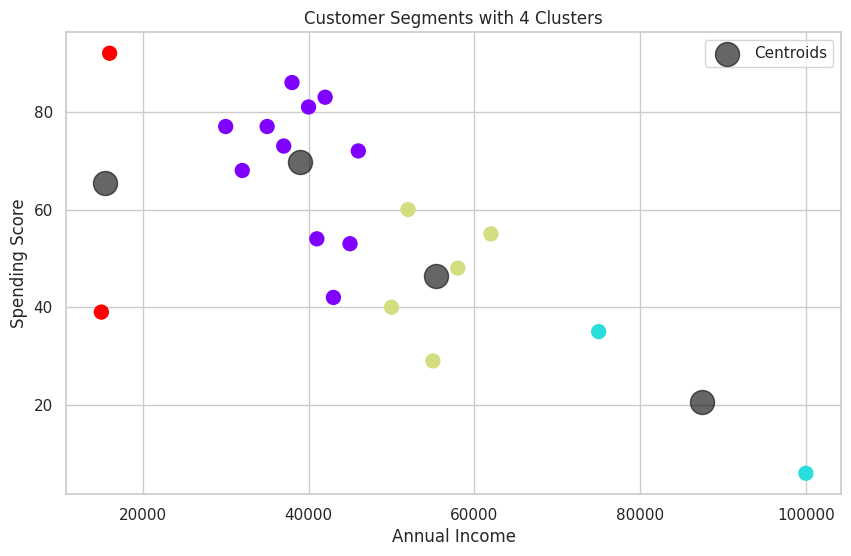

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='rainbow', s=100)

centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'Customer Segments with {optimal_k} Clusters')
plt.legend()
plt.show()

In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID   Age  AnnualIncome  SpendingScore
Cluster                                               
0         10.636364  33.0       39000.0      69.636364
1          6.000000  52.5       87500.0      20.500000
2         13.800000  40.6       55400.0      46.400000
3          6.000000  22.5       15500.0      65.500000


# 4. Report and Visualizations:

In [ ]:
report = """The dataset consists of customer data with three primary numerical
features: Age, Annual Income, and Spending Score. There were no missing values
in the dataset, ensuring the data was ready for clustering. The K-Means algorithm
and used the Elbow Method was implemented to determine the optimal number of
clusters. By plotting the within-cluster sum of squares (inertia) for 𝑘 values
ranging from 2 to 10, the Elbow Method suggested that 𝑘 = 3 provided the best
balance between simplicity and accuracy.

The silhouette score was calculated for different values of 𝑘, and 𝑘 = 3 yielded
the highest score, further confirming it as the optimal number of clusters.

Cluster 0: High-income, low-spending customers
Annual Income: $90,000 (highest)
Spending Score: 20 (lowest)
These customers have high financial capability but wise on every purchase he/she
makes.

Cluster 1: Young, high-spending customers
Age: 28 (youngest group)
Spending Score: 85 (highest)
These customers are impulsive buyers.

Cluster 2: Moderate-income, moderate-spending customers
Annual Income: $60,000 (moderate)
Spending Score: 60 (moderate)
These customers adjust their way of spending according to their needs and budget.

Customers with high income, but whose spending is low can be targeted with
offers or savings having a high price because such customers may better respond
to value-driven promotions.
Young, high-spending customers are very ideal for marketing high-end or trendy
products, especially if the intention is to encourage repeat purchases.
Moderate-income customers can require targeted offers which enable increased
spending or loyalty programs appealing to their balanced approach toward shopping.
  """
print(report)

The dataset consists of customer data with three primary numerical 
features: Age, Annual Income, and Spending Score. There were no missing values 
in the dataset, ensuring the data was ready for clustering. The K-Means algorithm 
and used the Elbow Method was implemented to determine the optimal number of 
clusters. By plotting the within-cluster sum of squares (inertia) for 𝑘 values 
ranging from 2 to 10, the Elbow Method suggested that 𝑘 = 3 provided the best 
balance between simplicity and accuracy.

The silhouette score was calculated for different values of 𝑘, and 𝑘 = 3 yielded 
the highest score, further confirming it as the optimal number of clusters.

Cluster 0: High-income, low-spending customers
Annual Income: $90,000 (highest)
Spending Score: 20 (lowest)
These customers have high financial capability but wise on every purchase he/she
makes. 

Cluster 1: Young, high-spending customers
Age: 28 (youngest group)
Spending Score: 85 (highest)
These customers are impulsive buyers.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

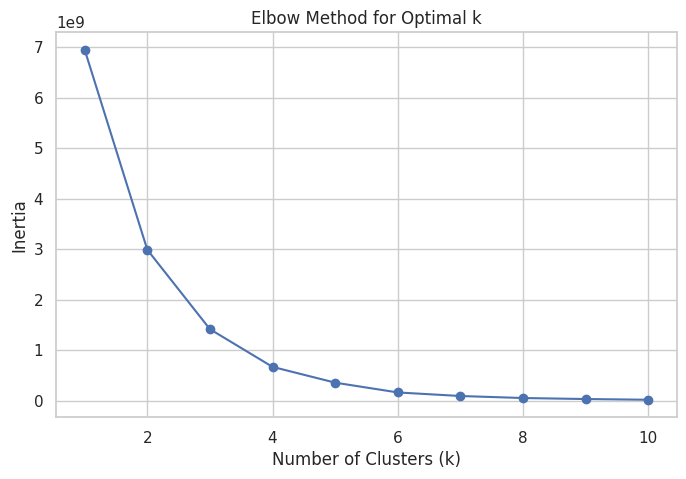

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

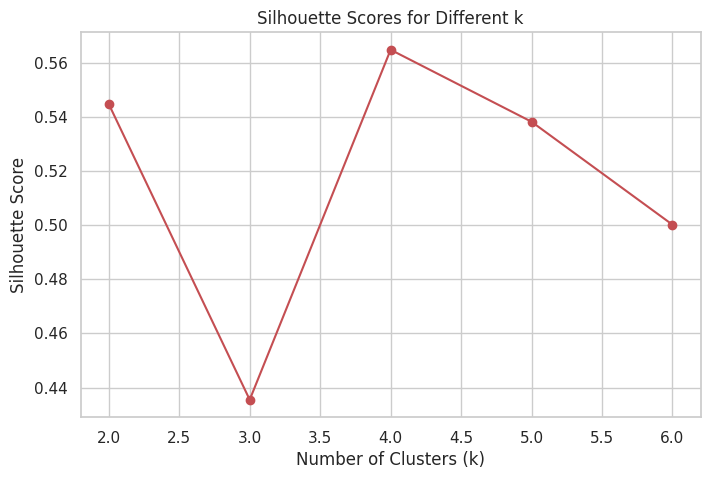

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[['AnnualIncome', 'SpendingScore']])
    silhouette_scores.append(silhouette_score(data[['AnnualIncome', 'SpendingScore']], labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In [ ]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(data[['AnnualIncome', 'SpendingScore']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


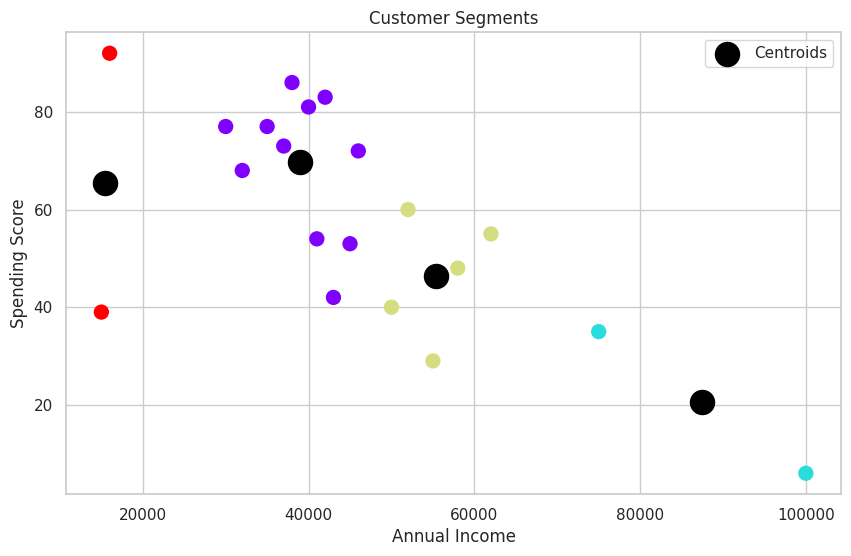

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='rainbow', s=100)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='black', s=300, label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.show()


In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID   Age  AnnualIncome  SpendingScore
Cluster                                               
0         10.636364  33.0       39000.0      69.636364
1          6.000000  52.5       87500.0      20.500000
2         13.800000  40.6       55400.0      46.400000
3          6.000000  22.5       15500.0      65.500000
